# Summary of Exploratory Data Analysis

___

# Import Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import re

In [2]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

___

# Import Cleaned Dataset

In [3]:
# import the cleaned dataset
wine_df = pd.read_csv('../data/filtered_wine.csv')

___

# Exploratory Data Analysis

## Summary Statistics

In [4]:
# statistics for numerical values
wine_df.describe()

,points,price
count,14664.000000,14664.000000
mean,91.235475,47.316080
std,1.676933,32.674595
min,89.000000,7.000000
25%,90.000000,30.000000
50%,91.000000,42.000000
75%,92.000000,55.000000
max,100.000000,2013.000000


In [5]:
# recap on the dataset
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14664 entries, 0 to 14663
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      14664 non-null  object 
 1   description  14664 non-null  object 
 2   designation  14664 non-null  object 
 3   points       14664 non-null  int64  
 4   price        14664 non-null  float64
 5   province     14664 non-null  object 
 6   region_1     14664 non-null  object 
 7   region_2     14664 non-null  object 
 8   taster_name  14664 non-null  object 
 9   title        14664 non-null  object 
 10  variety      14664 non-null  object 
 11  winery       14664 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 1.3+ MB


## Pairplot

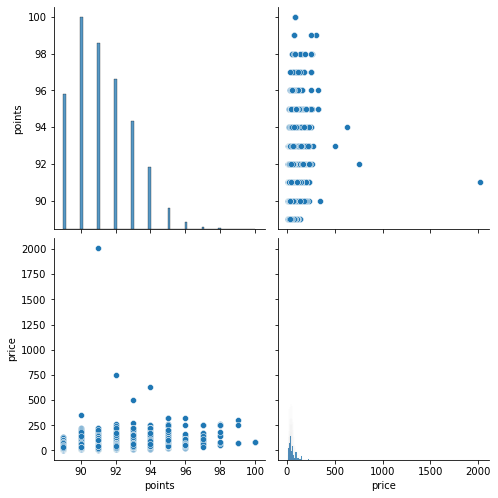

In [6]:
# visualise a pairplot with larger size
sns.pairplot(wine_df, height=3.5)
plt.show()

___Notes:___

It seems there are no correlations between price and points. This will be confirmed in the subsequent steps.

## Distributions

### Distribution of Prices

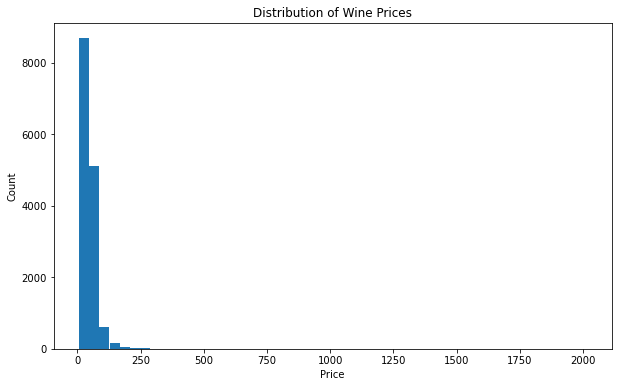

In [7]:
plt.figure(figsize=(10,6))
plt.hist(wine_df['price'], bins=50)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Wine Prices')
plt.show()

___Notes:___

Distribution of wine prices is heavily right-skewed with majority of the wines being priced below approximately USD 100.

### Distribution of Points

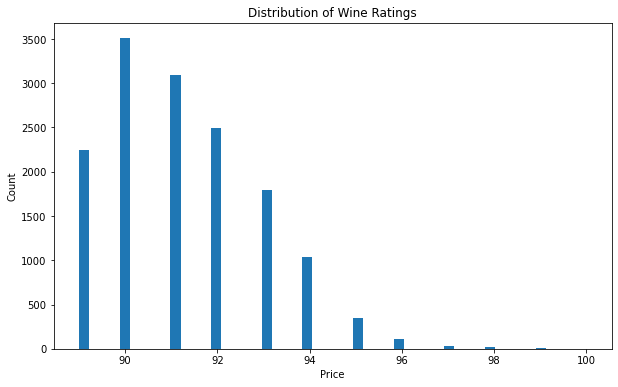

In [8]:
plt.figure(figsize=(10,6))
plt.hist(wine_df['points'], bins=50)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Wine Ratings')
plt.show()

In [9]:
# Count the number of occurrences of each rating
rating_counts = wine_df['points'].value_counts().sort_index()

In [10]:
# Create a new DataFrame to display the results
rating_table = pd.DataFrame({'Rating': rating_counts.index, 'Count': rating_counts.values})
print(rating_table)

    Rating  Count
0       89   2244
1       90   3509
2       91   3088
3       92   2493
4       93   1789
5       94   1034
6       95    343
7       96    111
8       97     29
9       98     18
10      99      4
11     100      2


___Notes:___

Wines with ratings of 90-92 are the most common in the dataset, with over 3,000 wines receiving these ratings. This suggests that these ratings may be the most "typical" or "average" for wines in this dataset.

Wines with ratings below 89 or above 95 are relatively rare, with fewer than 500 wines receiving these ratings. This suggests that wines with extreme ratings are less common in the dataset, which could be due to a variety of factors, such as the scoring criteria used by the tasters, the selection of wines in the dataset, or other factors.

There are only a small number of wines in the dataset with ratings above 95. This could suggest that these wines are particularly rare or exceptional, and may be of particular interest to wine enthusiasts or collectors.

## Correlation Heatmap

/var/folders/90/274n3kt55bl4fjg8t134196r0000gn/T/ipykernel_5699/4250469823.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = wine_df.corr()


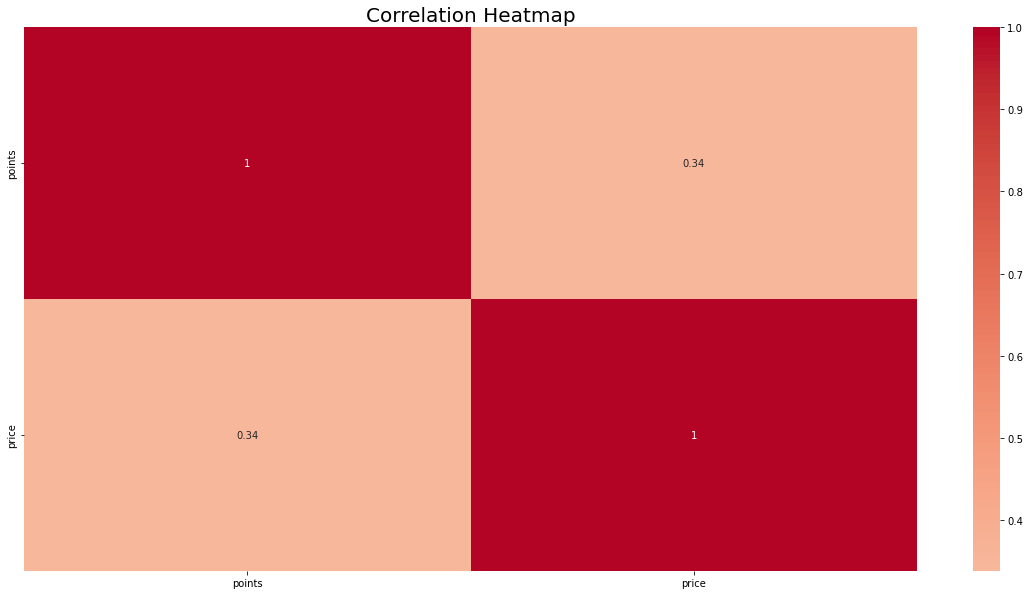

In [11]:
plt.figure(figsize=(20, 10))
corr_matrix = wine_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

___Notes:___

A correlation coefficient of 0.34 between "points" and "price" in a heatmap suggests a moderate positive correlation between these two variables. 

This suggests that there is some relationship between "points" and "price", but it may not be a very strong one.

## Correlation between Price and Rating

<Figure size 864x1296 with 0 Axes>

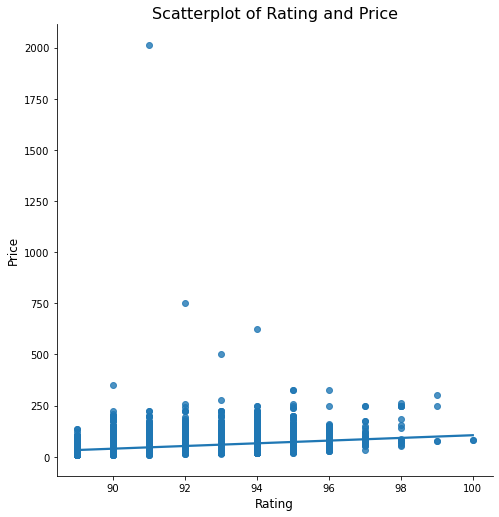

In [12]:
plt.figure(figsize=(12,18))
sns.lmplot(x='points', y='price', data=wine_df, height=7)
plt.title('Scatterplot of Rating and Price', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show();

___

# Analysis of Province and Region

In [13]:
wine_df['country'].unique()

array(['US'], dtype=object)

___Notes:___

Wines with a rating of more than 80 points all originate from the US.

## Analysis of Points vs Province

In [14]:
# group the dataframe by province and compute the mean of points
province_points = wine_df.groupby('province')['points'].mean().reset_index()

In [15]:
# sort the result in descending order
province_points_sorted = province_points.sort_values(by='points', ascending=False)

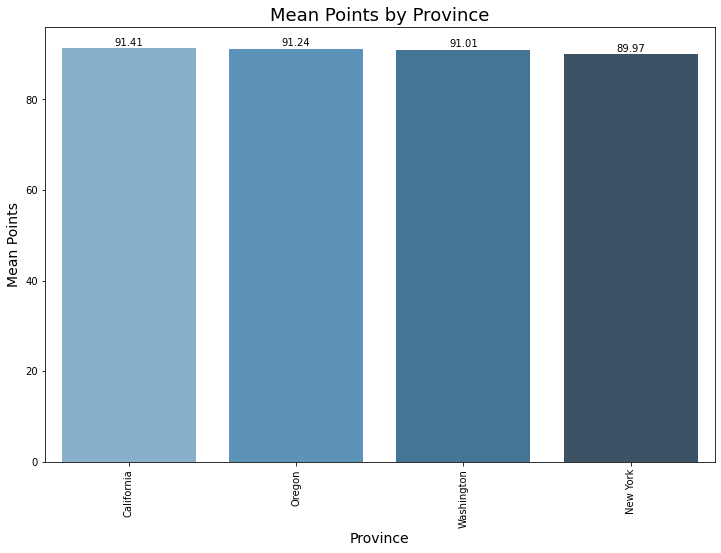

In [16]:
# create a bar plot of mean points by province
plt.figure(figsize=(12,8))
ax = sns.barplot(x='province', y='points', data=province_points_sorted, palette='Blues_d')
plt.xticks(rotation=90)
plt.xlabel('Province', fontsize=14)
plt.ylabel('Mean Points', fontsize=14)
plt.title('Mean Points by Province', fontsize=18)

# include labels
for i, v in enumerate(province_points_sorted['points']):
    ax.text(i, v+0.5, str(round(v, 2)), ha='center', fontsize=10)

plt.show()

___Notes:___

The plot suggests that wines produced in California tend to receive higher ratings on average than wines produced in the other three states. This could be due to a variety of factors, such as the climate and geography of the region, the types of grapes that are grown there, the expertise of the winemakers, or the reputation of the region.

Similarly, the fact that Oregon and Washington have higher average ratings than New York suggests that there may be differences in the quality of wines produced in these regions, or differences in the preferences of wine critics and consumers.

## Analysis of Wine Prices vs Province

In [17]:
# bar plot of the average price by province
province_price = wine_df.groupby('province')['price'].mean().reset_index()
sorted_provinces = province_price.sort_values(by='price', ascending=False)['province'].values

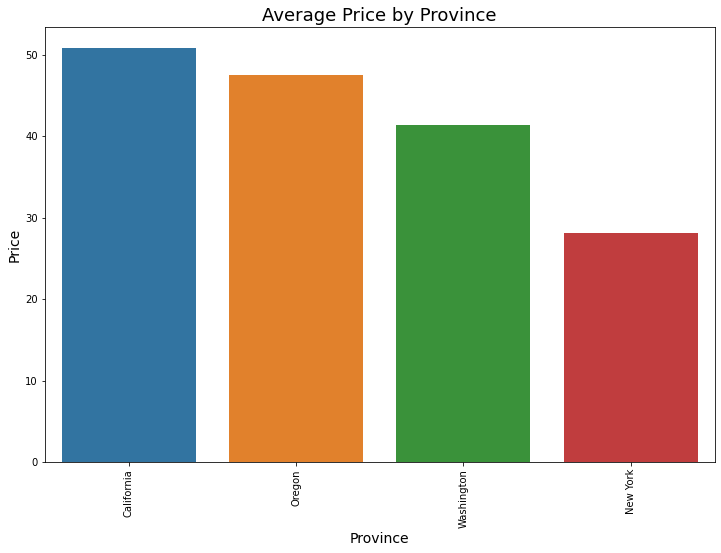

In [18]:
plt.figure(figsize=(12,8))
sns.barplot(x='province', y='price', data=province_price, order=sorted_provinces)
plt.xticks(rotation=90)
plt.xlabel('Province', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Average Price by Province', fontsize=18)
plt.show()

___Notes:___

These regions may produce higher quality wines as consumers are often willing to pay a premium for them, and production costs may be higher as well, which consequently drives up the price of the wines.

Additionally, the higher demand for wines from these regions compared to wines from other regions could also contribute to the higher prices observed.

In [19]:
# create a list of the top 10 varieties for each province
top_varieties_by_province = []
for province in wine_df['province'].unique():
    varieties = wine_df[wine_df['province']==province]['variety'].value_counts().head(10).reset_index()
    varieties.columns = ['Variety', 'Count']
    varieties['Province'] = province
    top_varieties_by_province.append(varieties)

In [20]:
# concatenate the list of dataframes into a single dataframe
top_varieties_by_province = pd.concat(top_varieties_by_province)

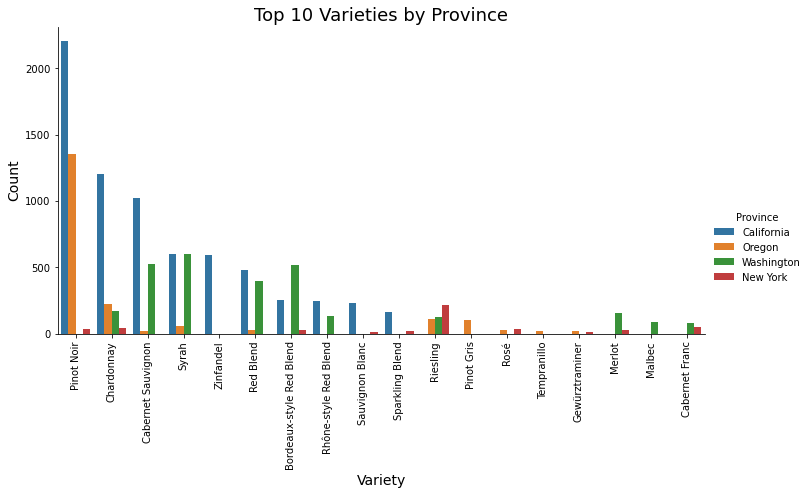

In [21]:
# create a bar plot for each province showing the top 10 varieties
g = sns.catplot(x='Variety', y='Count', hue='Province', data=top_varieties_by_province, kind='bar', height=5, aspect=2)
g.set_xticklabels(rotation=90)
plt.title('Top 10 Varieties by Province', fontsize=18)
plt.xlabel('Variety', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

## Analysis of Winery vs Province

In [22]:
# group the data by province and winery, and calculate the number of wines for each group
province_winery_count = wine_df.groupby(['province', 'winery']).size().reset_index(name='wine_count')

In [23]:
# sort the data by province and wine_count, and keep only the top 10 wineries for each province
province_winery_top10 = (province_winery_count.sort_values(['province', 'wine_count'], ascending=[True, False])
                         .groupby('province').head(10))

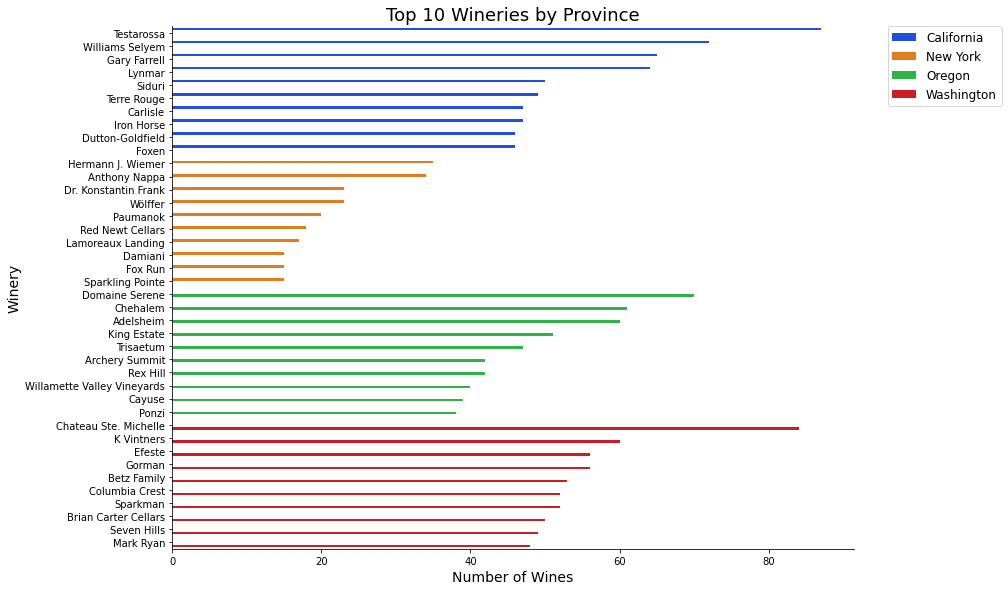

In [24]:
# create a horizontal bar plot of the top 10 wineries for each province
sns.catplot(x='wine_count', y='winery', hue='province', data=province_winery_top10,
            kind='bar', height=8, aspect=1.5, palette='bright', legend=False)
plt.xlabel('Number of Wines', fontsize=14)
plt.ylabel('Winery', fontsize=14)
plt.title('Top 10 Wineries by Province', fontsize=18)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12)
plt.show()

___

# Analysis of Wine Tasters

## Number of Wines Tasted by Taster Name

In [25]:
# count plot of wines tasted by taster_name
taster_count = wine_df['taster_name'].value_counts().reset_index()
sorted_tasters = taster_count.sort_values(by='taster_name', ascending=False)['index'].values

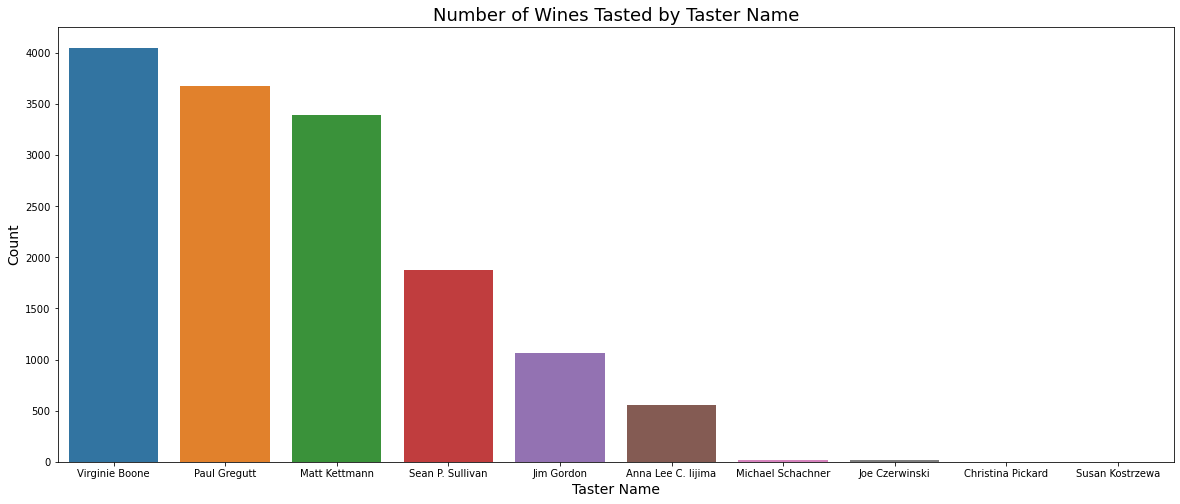

In [26]:
plt.figure(figsize=(20,8))
sns.countplot(x='taster_name', data=wine_df, order=sorted_tasters)
plt.xlabel('Taster Name', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Number of Wines Tasted by Taster Name', fontsize=18)
plt.show()

## Points by Taster Name

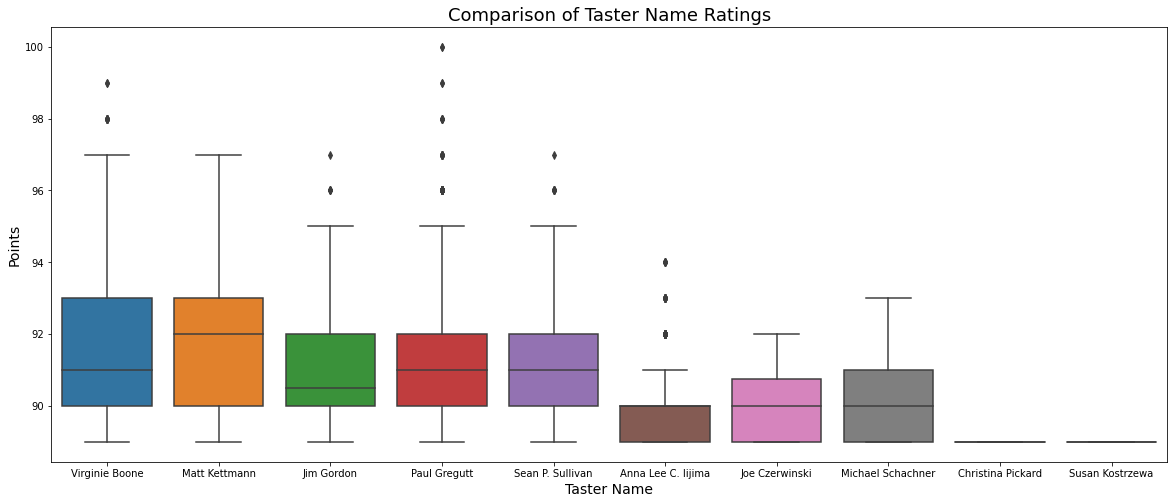

In [27]:
# Box plot of points by taster_name
plt.figure(figsize=(20,8))
sns.boxplot(x='taster_name', y='points', data=wine_df)
plt.xlabel('Taster Name', fontsize=14)
plt.ylabel('Points', fontsize=14)
plt.title('Comparison of Taster Name Ratings', fontsize=18)
plt.show()

## Average Price by Taster Name

In [28]:
# Bar plot of the average price by taster_name
taster_price = wine_df.groupby('taster_name')['price'].mean().reset_index()
sorted_tasters = taster_price.sort_values(by='price', ascending=False)['taster_name'].values

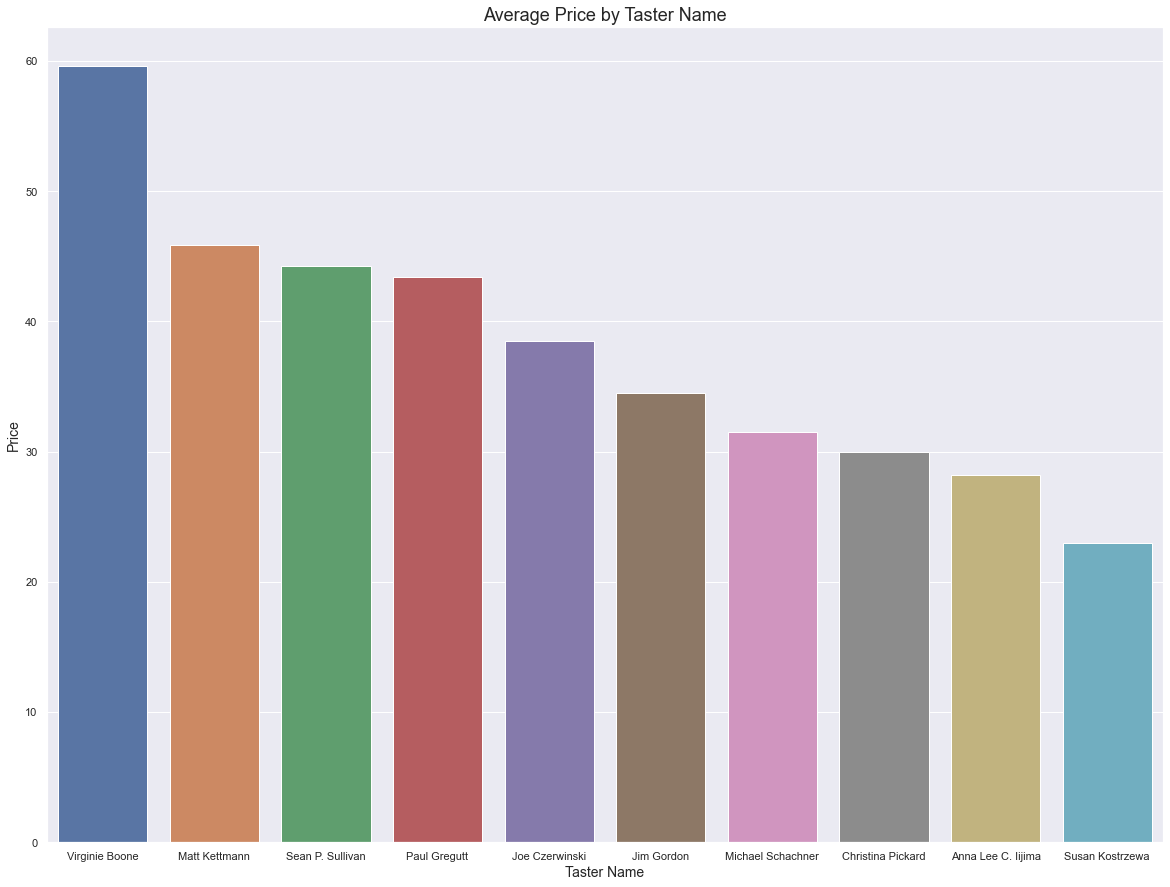

In [29]:
sns.set(rc={'figure.figsize':(20,15)})
sns.barplot(x='taster_name', y='price', data=taster_price, order=sorted_tasters)
plt.xlabel('Taster Name', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Average Price by Taster Name', fontsize=18)
plt.show()

___

# Text Analysis

In [30]:
def clean_text(text):
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub('[^A-Za-z]', ' ', text).lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words and the word "wine"
    stop_words = set(stopwords.words('english'))
    stop_words.add('wine')
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # Join the filtered tokens back into a string
    clean_text = ' '.join(filtered_tokens)
    return clean_text

In [31]:
# clean the description column and create a new column called cleaned_description
wine_df['cleaned_description'] = wine_df['description'].apply(clean_text)

In [32]:
# extract the top 10 words and bigrams from the cleaned_description column
words = []
bigrams = []
for text in wine_df['cleaned_description']:
    tokens = word_tokenize(text)
    words.extend(tokens)
    bigrams.extend(list(nltk.bigrams(tokens)))
word_counts = Counter(words)
bigram_counts = Counter(bigrams)
top_words = dict(word_counts.most_common(10))
top_bigrams = dict(bigram_counts.most_common(10))

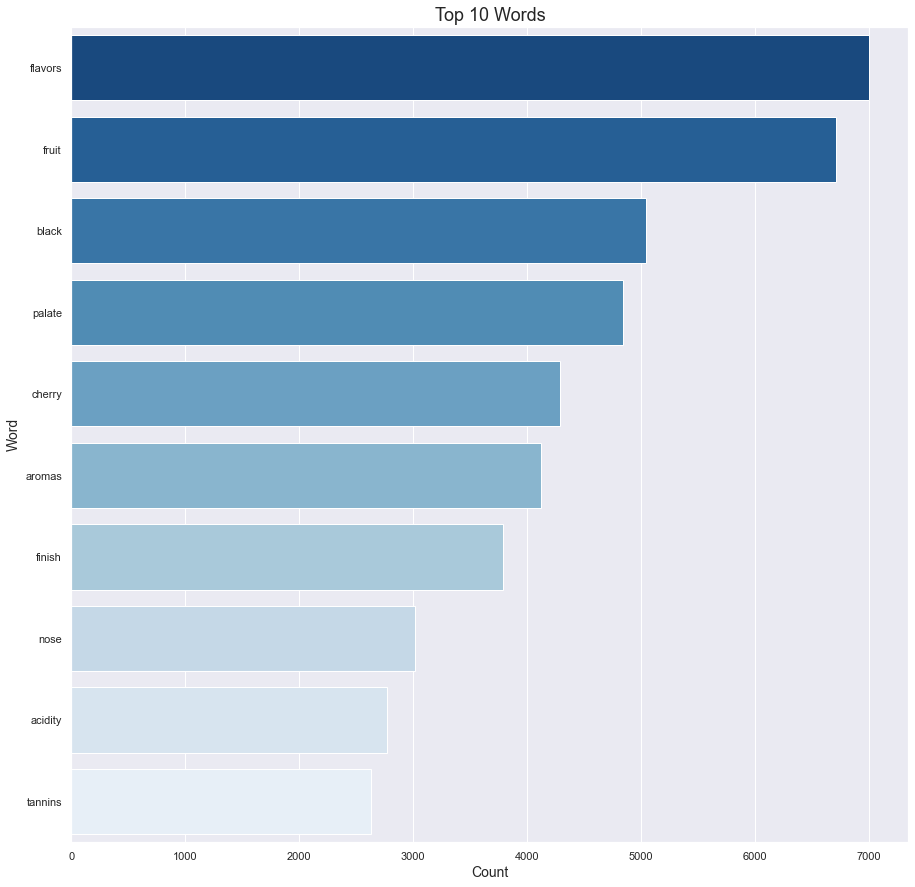

In [33]:
# top 10 words
plt.figure(figsize=(15,15))
sns.barplot(x=list(top_words.values()), y=list(top_words.keys()), palette='Blues_r')
plt.title('Top 10 Words', fontsize=18)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Word', fontsize=14)
plt.show()

___Notes:___

`flavors`, `fruit`, and `cherry`: These words suggest that wine drinkers pay close attention to the taste of the wine and the presence of fruit flavors, particularly cherry. This could be useful information for winemakers who are interested in creating wines with strong and enjoyable flavors.

`aromas` and `nose`: These words suggest that wine drinkers pay attention to the wine's aroma or scent. This could be useful information for winemakers who want to create wines with a pleasant and distinctive aroma.

`acidity` and `tannins`: These words suggest that wine drinkers pay attention to the structure and balance of the wine. Both acidity and tannins are important components of a wine's structure, and their presence and balance can have a significant impact on the wine's overall flavor and quality.

`palate` and `finish`: These words suggest that wine drinkers pay attention to the overall experience of drinking the wine, including the way it feels in the mouth and the aftertaste. This information could be useful for winemakers who are interested in creating wines that offer a satisfying and enjoyable drinking experience from start to finish.

In [34]:
# define a function to get the count for a given bigram, or return 0 if it does not exist
def get_bigram_count(bigram):
    return bigram_counts.get(bigram, 0)

top_bigrams = {
    ' '.join(bigram): get_bigram_count(bigram)
    for bigram, count in bigram_counts.most_common(10)
}

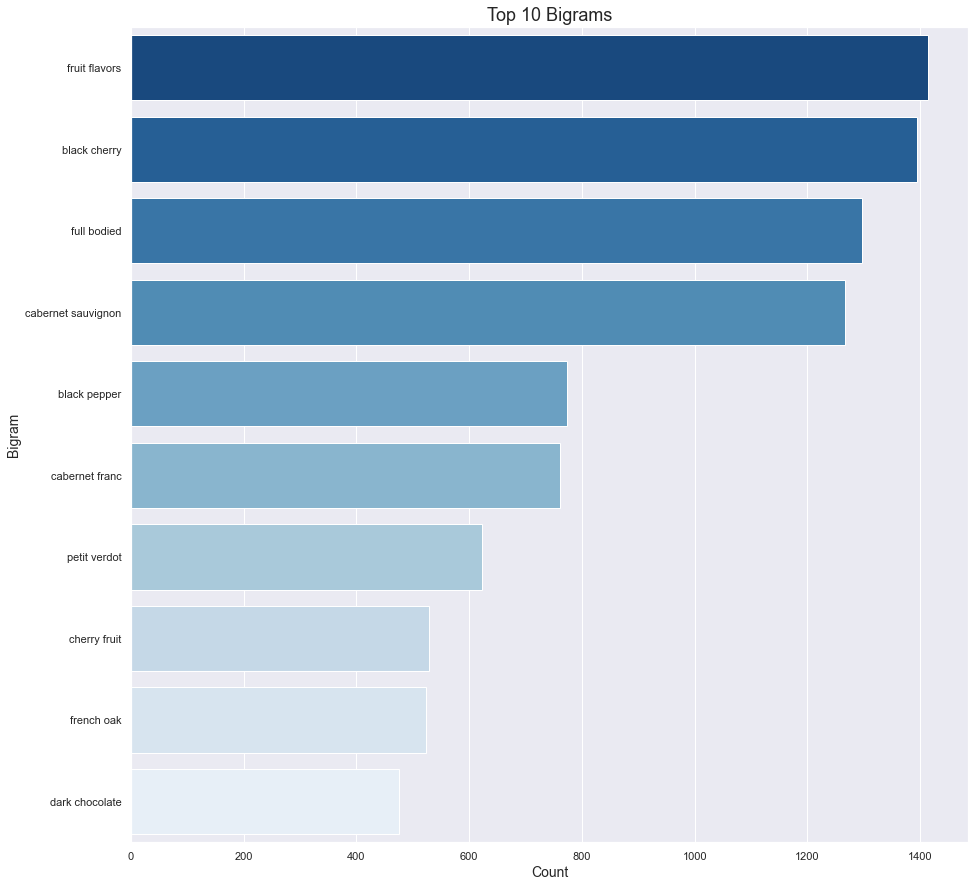

In [35]:
# plot the top 10 bigrams
plt.figure(figsize=(15,15))
sns.barplot(x=list(top_bigrams.values()), y=list(top_bigrams.keys()), palette='Blues_r')
plt.title('Top 10 Bigrams', fontsize=18)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Bigram', fontsize=14)
plt.show()

___Notes:___

Fruit flavors are highly emphasized in the descriptions, with `fruit flavors` and `cherry fruit` being two of the bigrams. Other common descriptors include `full-bodied`, `black cherry`, `black pepper`, and `dark chocolate`.

The mention of specific grape varieties such as `cabernet sauvignon`, `cabernet franc`, and `petit verdot` also indicates that these grapes are popular and commonly used in winemaking.

The use of terms like `french oak` suggests that the type of oak used for aging may also be an important factor in the flavor profile of the wines.

In [36]:
# Combine all cleaned descriptions into a single string
text = ' '.join(wine_df['cleaned_description'])

In [37]:
# Create a WordCloud object with a custom colormap
wordcloud = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='steelblue', colormap='viridis')

In [38]:
# Generate a word cloud from the text
wordcloud.generate(text);

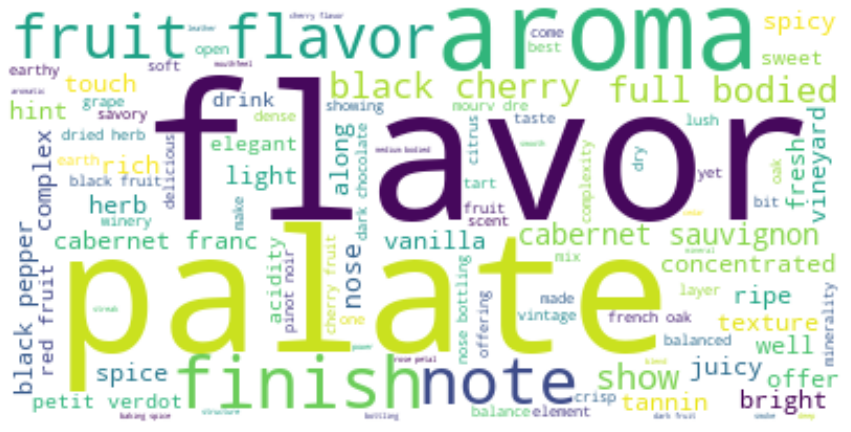

In [39]:
# Plot the word cloud
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [40]:
# Create a SentimentIntensityAnalyzer object
sid = SentimentIntensityAnalyzer()

In [41]:
# Define a function to get the sentiment score for a given text
def get_sentiment_score(text):
    # Use SentimentIntensityAnalyzer to get the sentiment score
    scores = sid.polarity_scores(text)
    # Return the compound score, which ranges from -1 to 1
    return scores['compound']

In [42]:
# Calculate the sentiment score for each cleaned_description
wine_df['sentiment_score'] = wine_df['cleaned_description'].apply(get_sentiment_score)

In [43]:
# Calculate the mean sentiment score
mean_sentiment_score = wine_df['sentiment_score'].mean()

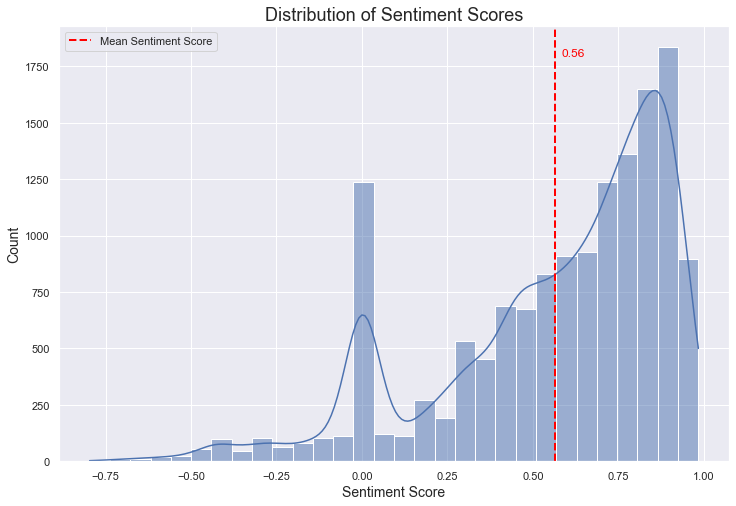

In [44]:
# Plot the distribution of sentiment scores
plt.figure(figsize=(12,8))
sns.histplot(wine_df['sentiment_score'], kde=True, bins=30)
plt.axvline(mean_sentiment_score, color='red', linestyle='dashed', linewidth=2, label='Mean Sentiment Score')
plt.text(mean_sentiment_score+0.02, plt.ylim()[1]*0.95, f'{mean_sentiment_score:.2f}', ha='left', va='top', fontsize=12, color='red')
plt.title('Distribution of Sentiment Scores', fontsize=18)
plt.xlabel('Sentiment Score', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend()
plt.show()

___Notes:___

Majority of the sentiments have a positive sentiment. The negative sentiment scores are more spread out and less frequent, which results in a left-skewed distribution.

The mean score being 0.56 indiciates that the overall sentiment of the wine reviews is positive.